In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, matthews_corrcoef, PrecisionRecallDisplay, RocCurveDisplay, ConfusionMatrixDisplay, zero_one_loss, f1_score, precision_score, balanced_accuracy_score, recall_score
import plotly.express as px
data = pd.read_csv("C:/Users/aless/OneDrive - Università degli Studi di Catania/tesi/Experimental part/experiment_round1/round1.csv")
data.head()

,BPM,ST,Predicted,True,ID
0,86,32.99,1,1,1
1,83,32.98,0,1,1
2,83,32.99,0,1,1
3,79,32.99,0,1,1
4,79,33.01,1,1,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2815 entries, 0 to 2814
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BPM        2815 non-null   int64  
 1   ST         2815 non-null   float64
 2   Predicted  2815 non-null   int64  
 3   True       2815 non-null   int64  
 4   ID         2815 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 110.1 KB


In [4]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
BPM,2815.0,70.610302,8.387631,50.00,66.00,72.00,77.00,87.00
ST,2815.0,33.581208,0.588427,32.18,33.18,33.51,33.78,35.76
Predicted,2815.0,0.032327,0.176898,0.00,0.00,0.00,0.00,1.00
True,2815.0,0.426288,0.494625,0.00,0.00,0.00,1.00,1.00
ID,2815.0,2.522202,1.123244,1.00,2.00,3.00,4.00,4.00


## Exploratory Data Analysis

In [5]:
fig = px.density_contour(data, x="BPM", y="ST", color="Predicted", marginal_x = 'box', marginal_y = 'box', template ='simple_white')
fig.show()

In [6]:
data['Predicted'] = pd.Categorical(data['Predicted'])
fig = px.histogram(data, x='Predicted', color='Predicted', barmode='group', template ='simple_white')
fig.show()

## Signal-to-Noise Ratio

In [8]:
def signaltonoise_dB(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return 20*np.log10(abs(np.where(sd == 0, 0, m/sd)))

In [9]:
grouped_data = data.groupby('ID')['BPM'].apply(signaltonoise_dB)

# Calculate the mean and standard deviation of the metrics.
mean_metric = grouped_data.mean()
std_metric = grouped_data.std()

# Convert the metrics to a list if needed.
metrics_list = grouped_data.tolist()

print("Average BPM SNR:", round(mean_metric,2), '(+-', round(std_metric,2), ')')

Average BPM SNR: 21.28 (+- 3.12 )


In [10]:
grouped_data = data.groupby('ID')['ST'].apply(signaltonoise_dB)

# Calculate the mean and standard deviation of the metrics.
mean_metric = grouped_data.mean()
std_metric = grouped_data.std()

# Convert the metrics to a list if needed.
metrics_list = grouped_data.tolist()

print("Average BPM SNR:", round(mean_metric,2), '(+-', round(std_metric,2), ')')

Average BPM SNR: 39.54 (+- 4.54 )


## Metrics

In [12]:
y_true = data['True']
y_pred = data['Predicted']

In [13]:
n_bootstraps = 10
matthews_scores = []
zero_one_loss_scores = []
f1_scores = []
precision_scores = []
recall_scores = []
accuracy_scores = []

for _ in range(n_bootstraps):
  indices = np.random.choice(len(y_true), size=len(y_true), replace=True)
  bootstrap1 = y_true[indices]
  bootstrap2 = y_pred[indices]

  mcc = matthews_corrcoef(bootstrap1, bootstrap2)
  matthews_scores.append(mcc)

  zero_one = zero_one_loss(bootstrap1, bootstrap2, normalize=True)
  zero_one_loss_scores.append(zero_one)

  f1 = f1_score(bootstrap1, bootstrap2)
  f1_scores.append(f1)

  accuracy = balanced_accuracy_score(bootstrap1, bootstrap2)
  accuracy_scores.append(accuracy)

  precision = precision_score(bootstrap1, bootstrap2)
  precision_scores.append(precision)

  recall = recall_score(bootstrap1, bootstrap2)
  recall_scores.append(recall)

bootstrap_mean_mcc = np.mean(matthews_scores)
bootstrap_std_mcc = np.std(matthews_scores)

bootstrap_mean_loss = np.mean(zero_one_loss_scores)
bootstrap_std_loss = np.std(zero_one_loss_scores)

bootstrap_mean_f1 = np.mean(f1_scores)
bootstrap_std_f1 = np.std(f1_scores)

bootstrap_mean_accuracy = np.mean(accuracy_scores)
bootstrap_std_accuracy = np.std(accuracy_scores)

bootstrap_mean_recall = np.mean(recall_scores)
bootstrap_std_recall = np.std(recall_scores)

bootstrap_mean_precision = np.mean(precision_scores)
bootstrap_std_precision = np.std(precision_scores)

print(f"Bootstrap Mean Matthews Correlation Coefficient: {bootstrap_mean_mcc:.2f}")
print(f"Bootstrap Std Matthews Correlation Coefficient: {bootstrap_std_mcc:.2f}")

print(f"Bootstrap Mean Loss: {bootstrap_mean_loss:.2f}")
print(f"Bootstrap Std Loss: {bootstrap_std_loss:.2f}")

print(f"Bootstrap Mean F1: {bootstrap_mean_f1:.2f}")
print(f"Bootstrap Std F1: {bootstrap_std_f1:.2f}")

print(f"Bootstrap Mean Accuracy: {bootstrap_mean_accuracy:.2f}")
print(f"Bootstrap Std Accuracy: {bootstrap_std_accuracy:.2f}")

print(f"Bootstrap Mean Recall: {bootstrap_mean_recall:.2f}")
print(f"Bootstrap Std Recall: {bootstrap_std_recall:.2f}")

print(f"Bootstrap Mean Precision: {bootstrap_mean_precision:.2f}")
print(f"Bootstrap Std Precision: {bootstrap_std_precision:.2f}")

Bootstrap Mean Matthews Correlation Coefficient: 0.18
Bootstrap Std Matthews Correlation Coefficient: 0.01
Bootstrap Mean Loss: 0.40
Bootstrap Std Loss: 0.01
Bootstrap Mean F1: 0.10
Bootstrap Std F1: 0.01
Bootstrap Mean Accuracy: 0.53
Bootstrap Std Accuracy: 0.00
Bootstrap Mean Recall: 0.05
Bootstrap Std Recall: 0.01
Bootstrap Mean Precision: 1.00
Bootstrap Std Precision: 0.00


In [14]:
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.59      1.00      0.74      1615
           1       1.00      0.05      0.10      1200

    accuracy                           0.60      2815
   macro avg       0.79      0.53      0.42      2815
weighted avg       0.76      0.60      0.47      2815



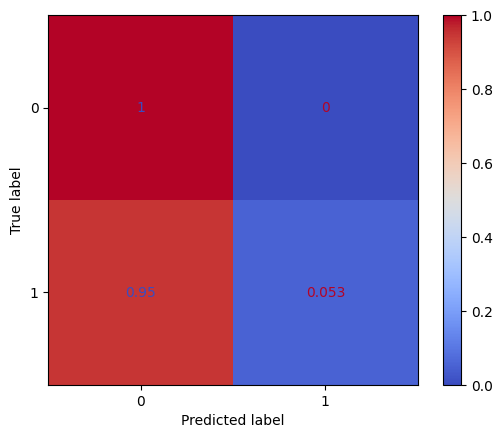

In [15]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, cmap='coolwarm', normalize='true')
plt.show()

In [23]:
stress_peaks = data.loc[data['True'] == 1, ['Predicted', 'True']]

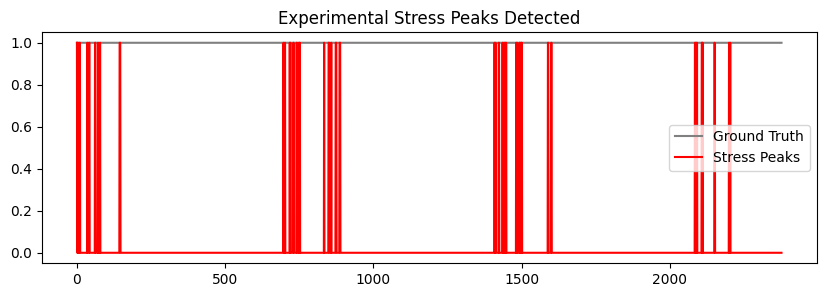

In [30]:
plt.figure(figsize=(10, 3))
plt.plot(stress_peaks['True'], color='grey', label = 'Ground Truth')
plt.plot(stress_peaks['Predicted'], color='red', label='Stress Peaks')
plt.legend()
plt.title('Experimental Stress Peaks Detected')
plt.show()